# Autoencoder

## what is autoencoder?
> Autoencoder is essentially a Neural Network that replicates the input layer in its output, after coding it in-between.

## How it work?
1. First check dataset is null or not.if not then we have to check is there any variables is unneed or not id is there we have to remove them.

2. Then we have to encode catagorical variable to one hot encoding and also Scale variables into 0 and 1 range 

3. Then we have to choose size of our encoded representations.

4. Create autoencoding model in step wise input,encoding,decoding.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input
from keras import optimizers, regularizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn import preprocessing
sns.set_style("whitegrid")

np.random.seed(697)

In [30]:
df = pd.read_csv('dataset.csv', header = 1)
df = df.rename(columns = {'default payment next month': 'Default'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [31]:
#Check for missing values
df.isnull().sum()


ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [32]:
# Drop unneeded variables(Here we do't have need of "ID" column )
df = df.drop(['ID'], axis = 1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
#Encode categorical variables to ONE-HOT

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df = pd.get_dummies(df, columns = categorical_columns)


In [33]:
#Scale variables to [0,1] range
columns_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'
    , 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[columns_to_scale]=df[columns_to_scale].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df[columns_to_scale]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [51]:
#split in to tain test dataset
train, test_df = train_test_split(df, test_size = 0.15, random_state= 1984)
train_df, dev_df = train_test_split(train, test_size = 0.15, random_state= 1984)


In [54]:
# Check distribution of labels in train and test set
train_df.Default.sum()/train_df.shape[0] 
dev_df.Default.sum()/dev_df.shape[0]
test_df.Default.sum()/test_df.shape[0] 

0.21688888888888888

In [9]:
# Define the final train and test sets
train_y = train_df.Default
dev_y = dev_df.Default
test_y = test_df.Default

train_x = train_df.drop(['Default'], axis = 1)
dev_x = dev_df.drop(['Default'], axis = 1)
test_x = test_df.drop(['Default'], axis = 1)

train_x =np.array(train_x)
dev_x =np.array(dev_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
dev_y = np.array(dev_y)
test_y = np.array(test_y)


In [38]:
# Choose size of our encoded representations (we will reduce our initial features to this number)
encoding_dim = 16

# Define input layer
input_data = Input(shape=(train_x.shape[1],))
print("input_data:",input_data)
# Define encoding layer
encoded = Dense(encoding_dim, activation='elu')(input_data)
print("encoding layer:",encoded)
# Define decoding layer
decoded = Dense(train_x.shape[1], activation='sigmoid')(encoded)
print("decoding layer:",decoded)
# Create the autoencoder model
autoencoder = Model(input_data, decoded)
print("autoencoder layer:",autoencoder)
#Compile the autoencoder model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

input_data: KerasTensor(type_spec=TensorSpec(shape=(None, 91), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
encoding layer: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='dense_8/Elu:0', description="created by layer 'dense_8'")
decoding layer: KerasTensor(type_spec=TensorSpec(shape=(None, 91), dtype=tf.float32, name=None), name='dense_9/Sigmoid:0', description="created by layer 'dense_9'")
autoencoder layer: <keras.engine.functional.Functional object at 0x7f7d753920d0>


In [55]:
#Fit to train set, validate with dev set and save to hist_auto so we can use in visulazation
hist_auto = autoencoder.fit(train_x, train_x,epochs=50,batch_size=256,shuffle=True,validation_data=(dev_x, dev_x))

Epoch 1/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0466 - val_loss: 0.0465
Epoch 2/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.0464
Epoch 3/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0462
Epoch 4/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0462 - val_loss: 0.0461
Epoch 5/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.0460
Epoch 6/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0460 - val_loss: 0.0459
Epoch 7/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.0459
Epoch 8/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.0458
Epoch 9/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.0457
Epoch 10/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0456 - val_loss: 0.0456
Epoch 11/50
85/85 [

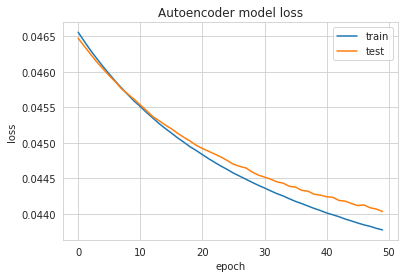

In [56]:
# Summarize history for loss
plt.figure()
plt.plot(hist_auto.history['loss'])
plt.plot(hist_auto.history['val_loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [44]:
# Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
encoder = Model(input_data, encoded)
# Create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [14]:
# Encode and decode our test set (compare them vizually just to get a first insight of the autoencoder's performance)
encoded_x = encoder.predict(test_x)
decoded_output = decoder.predict(encoded_x)

In [45]:
#Encode data set from above using the encoder
encoded_train_x = encoder.predict(train_x)
encoded_test_x = encoder.predict(test_x)

model = Sequential()
model.add(Dense(16, input_dim=encoded_train_x.shape[1],kernel_initializer='normal',activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

history = model.fit(encoded_train_x, train_y, validation_split=0.2, epochs=10, batch_size=64)


Epoch 1/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4743 - val_loss: 0.4511
Epoch 2/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4483 - val_loss: 0.4476
Epoch 3/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4462 - val_loss: 0.4458
Epoch 4/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 0.4460
Epoch 5/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4441 - val_loss: 0.4452
Epoch 6/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4408 - val_loss: 0.4453
Epoch 7/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.4470
Epoch 8/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4430 - val_loss: 0.4455
Epoch 9/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4408 - val_loss: 0.4458
Epoch 10/10
271/271 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 0.4452

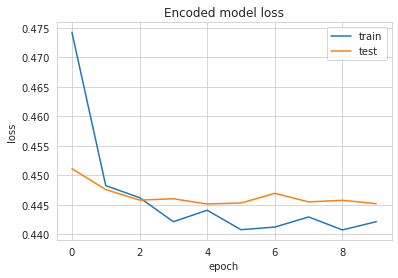

In [46]:
# Summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Encoded model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
#Predict on test set
predictions_NN_prob = model.predict(encoded_test_x)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
predictions_NN_01


array([0, 0, 0, ..., 0, 0, 0])

In [48]:
#Print accuracy
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)


Overall accuracy of Neural Network model: 0.8211111111111111


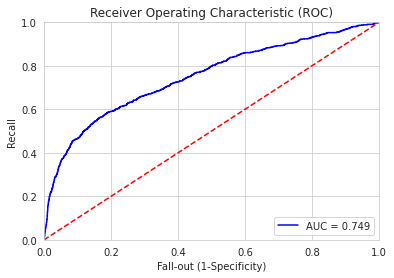

In [49]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

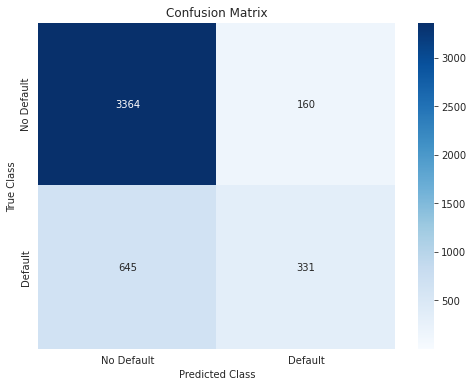

In [50]:
#Print Confusion Matrix
cm = confusion_matrix(test_y, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()